In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

In [2]:
pdata = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
pdata.shape # Check number of columns and rows in data frame

(5000, 14)

In [4]:
pdata.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [5]:
pdata.head(10) # To check first 5 rows of data set

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [6]:
pdata.isnull().values.any()

False

In [7]:
pdata = pd.get_dummies(pdata, columns=['Education'])
pdata = pdata.rename(columns={'Education_1': 'Undergrad', 'Education_2': 'Graduate', 'Education_3': 'Advanced'})
pdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Undergrad,Graduate,Advanced
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,1,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,1,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,1,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


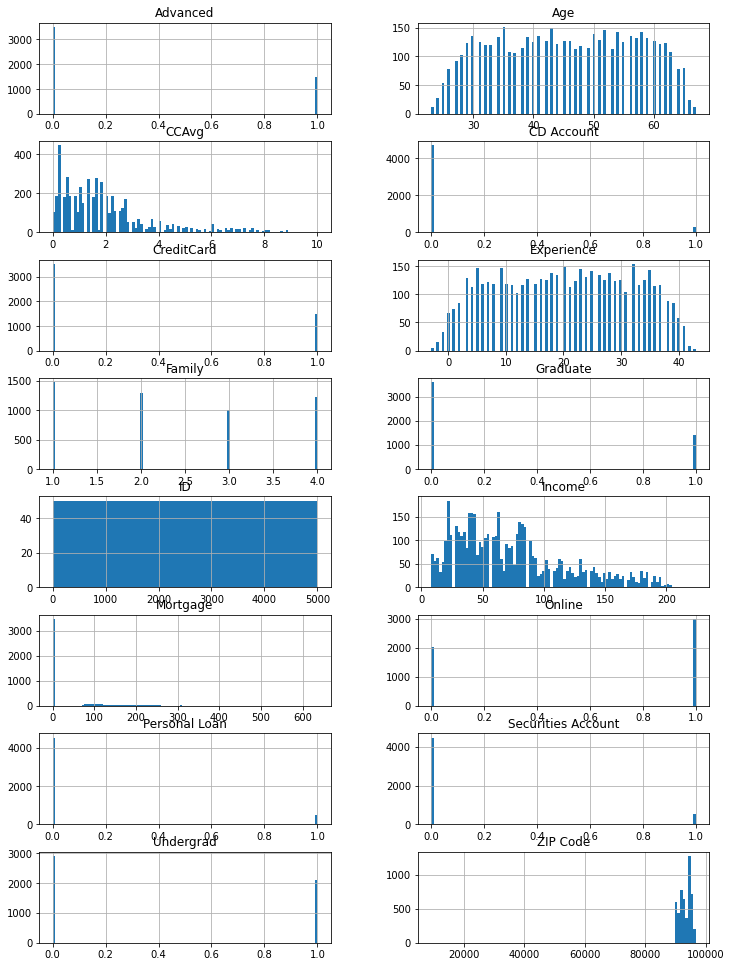

In [8]:
pdata.hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

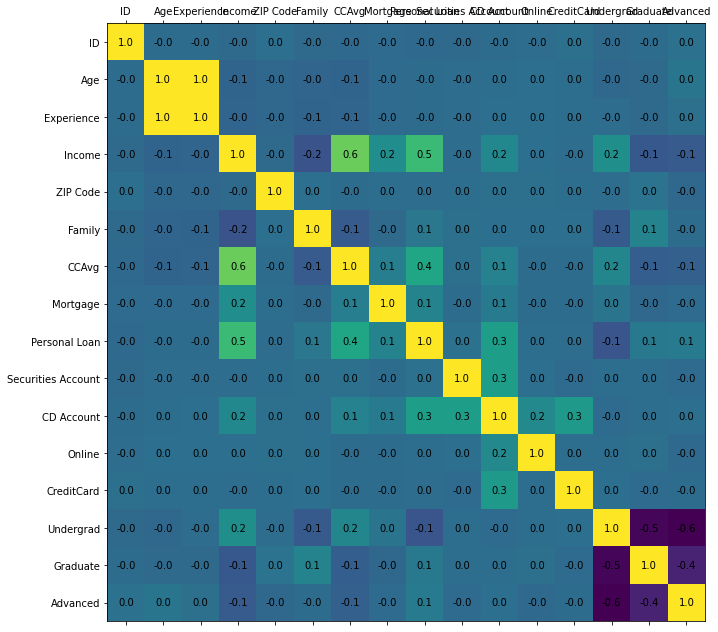

In [9]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
        
plot_corr(pdata)

In [10]:
pdata.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


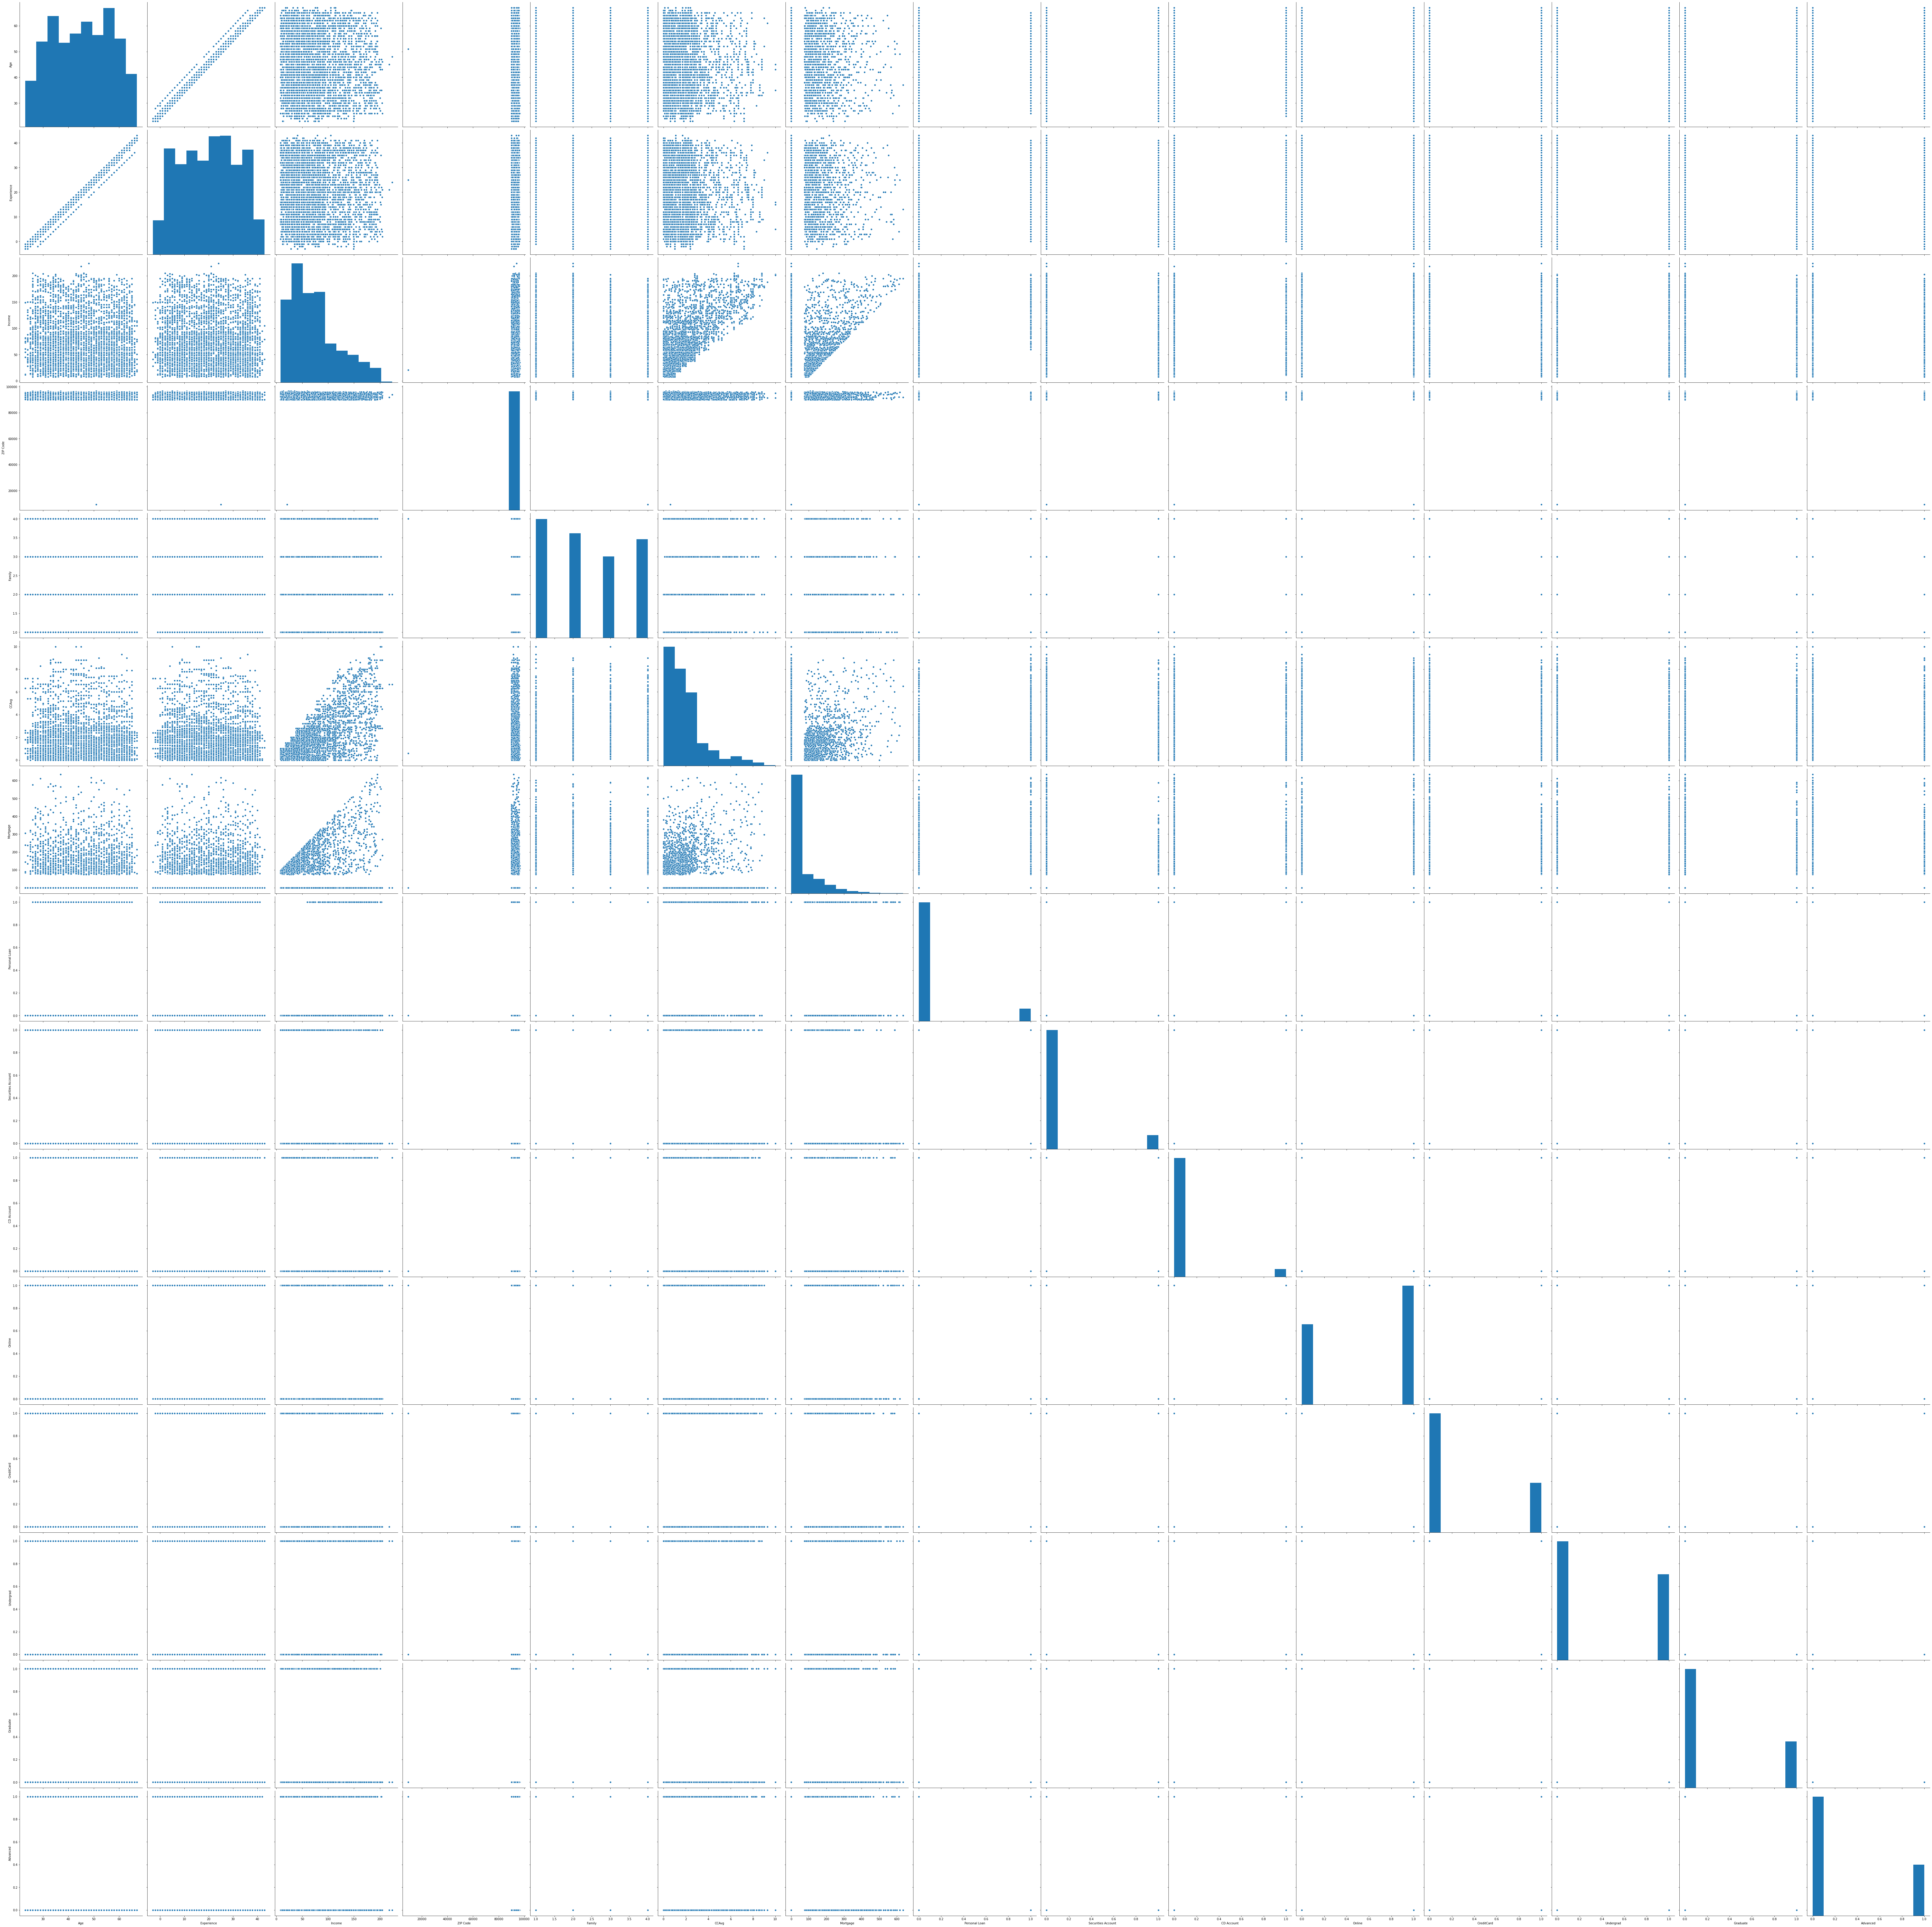

In [11]:
sns.pairplot(pdata.iloc[:,1:], height=6)

In [12]:
pdata[pdata['Experience'] < 0]['Experience'].count()
### negative experience does not make sense. setting it to 0

52

In [13]:
pdata.loc[pdata['Experience'] < 0, 'Experience'] = 0


In [14]:
pdata[pdata['Experience'] < 0]['Experience'].count()


0

In [15]:
pdata.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [16]:
####
####Number of unique in each column?
pdata.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Undergrad                2
Graduate                 2
Advanced                 2
dtype: int64

In [17]:
####Number of people with zero mortgage?
pdata[pdata['Mortgage'] ==0]['Mortgage'].count()

3462

In [18]:
####Number of people with zero credit card spending per month?
pdata[pdata['CCAvg'] ==0]['CCAvg'].count()

106

In [19]:
#### Value counts of all categorical columns.
for column in pdata.columns:
     print("\n" + column)
     print(pdata[column].value_counts())


ID
2047    1
2608    1
4647    1
2600    1
553     1
       ..
3263    1
1218    1
3267    1
1222    1
2049    1
Name: ID, Length: 5000, dtype: int64

Age
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

Experience
32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
24    131
3     129
16    127
14    127
30    126
34    125
17    125
27    125
22    124
29    124
7     121
15    119
8     119
6     119
0     118
10    118
33    117
13    117
37    116
11    116
36    114
21    113
4     113
31    104
12    10

In [20]:
X=pd.DataFrame(columns=['Age','Income','Family','CCAvg','Mortgage','Securities Account','CD Account','CreditCard','Online','Undergrad','Graduate','Advanced'],data=pdata)

y=pdata.iloc[:,8]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [21]:
X.head()

,Age,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,CreditCard,Online,Undergrad,Graduate,Advanced
0,25,49,4,1.6,0,1,0,0,0,1,0,0
1,45,34,3,1.5,0,1,0,0,0,1,0,0
2,39,11,1,1.0,0,0,0,0,0,1,0,0
3,35,100,1,2.7,0,0,0,0,0,0,1,0
4,35,45,4,1.0,0,0,0,1,0,0,1,0


In [22]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [23]:
##from sklearn.linear_model import LogisticRegression
##logit =LogisticRegression(max_iter=1000)
##logit.fit(X_train,y_train)
##y_pred_logit=logit.predict(X_test)

In [24]:
# Fit the model on train
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.002856  0.052238  0.401417  0.129319  0.000736 -0.486475  2.870937   

          7         8         9        10        11  intercept  
0 -0.734597 -0.936171 -4.527793 -0.999188 -0.888766  -6.415747  


In [25]:
model_score = model.score(X_test, y_test)
print(model_score)

0.9533333333333334


<AxesSubplot:>

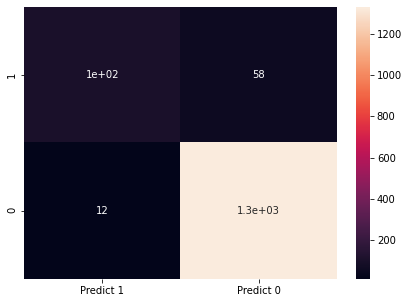

In [26]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [27]:
from sklearn import metrics

cnf_matrix_logit = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix_logit

array([[1330,   12],
       [  58,  100]])

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print("Precision:",metrics.precision_score(y_test, y_predict))
print("Recall:",metrics.recall_score(y_test, y_predict))

Accuracy: 0.9533333333333334
Precision: 0.8928571428571429
Recall: 0.6329113924050633


In [29]:
### the model has high Accuracy and Precision, but low Recall
### returning very few results, but most of its predicted labels are correct

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score


liblinear
          0         1         2         3         4         5         6  \
0 -0.002856  0.052238  0.401417  0.129319  0.000736 -0.486475  2.870937   

          7         8         9        10        11  intercept  
0 -0.734597 -0.936171 -4.527793 -0.999188 -0.888766  -6.415747  
0.9533333333333334
Accuracy: 0.9533333333333334
Precision: 0.8928571428571429
Recall: 0.6329113924050633
Trainig accuracy 0.9611428571428572
Testing accuracy 0.9533333333333334
F1 Score: 0.7407407407407407
Roc Auc Score: 0.8119847573053632


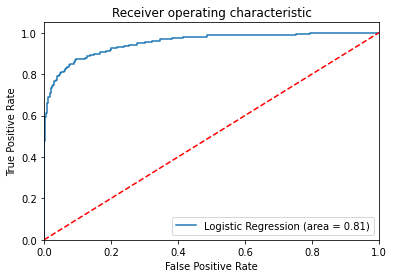

                   Col  Coeff
9            Undergrad   4.53
6           CD Account   2.87
10            Graduate   1.00
8               Online   0.94
11            Advanced   0.89
7           CreditCard   0.73
5   Securities Account   0.49
2               Family   0.40
3                CCAvg   0.13
1               Income   0.05
0                  Age   0.00
4             Mortgage   0.00
newton-cg
          0         1         2         3         4         5         6  \
0  0.018331  0.061316  0.605454  0.163746  0.000986 -0.338171  2.903664   

          7        8         9        10        11  intercept  
0 -0.633078 -0.91317 -2.720732  1.283759  1.436924 -11.360706  
0.9526666666666667
Accuracy: 0.9526666666666667
Precision: 0.8717948717948718
Recall: 0.6455696202531646
Trainig accuracy 0.9611428571428572
Testing accuracy 0.9526666666666667
F1 Score: 0.7418181818181819
Roc Auc Score: 0.8171961365051218


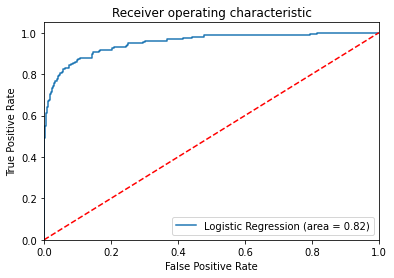

                   Col  Coeff
6           CD Account   2.90
9            Undergrad   2.72
11            Advanced   1.44
10            Graduate   1.28
8               Online   0.91
7           CreditCard   0.63
2               Family   0.61
5   Securities Account   0.34
3                CCAvg   0.16
1               Income   0.06
0                  Age   0.02
4             Mortgage   0.00
lbfgs
          0         1         2         3         4         5         6  \
0  0.018177  0.061245  0.604551  0.164128  0.000984 -0.343797  2.915482   

          7         8         9        10        11  intercept  
0 -0.634869 -0.910576 -2.741984  1.261822  1.411268  -11.32209  
0.9526666666666667
Accuracy: 0.9526666666666667
Precision: 0.8717948717948718
Recall: 0.6455696202531646
Trainig accuracy 0.9611428571428572
Testing accuracy 0.9526666666666667
F1 Score: 0.7418181818181819
Roc Auc Score: 0.8171961365051218


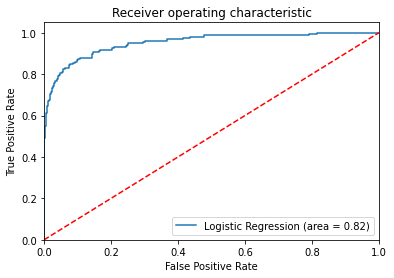

                   Col  Coeff
6           CD Account   2.92
9            Undergrad   2.74
11            Advanced   1.41
10            Graduate   1.26
8               Online   0.91
7           CreditCard   0.63
2               Family   0.60
5   Securities Account   0.34
3                CCAvg   0.16
1               Income   0.06
0                  Age   0.02
4             Mortgage   0.00
sag
          0         1         2         3         4       5         6  \
0 -0.059443  0.034699 -0.083124  0.060138  0.000186 -0.0612  1.251319   

          7         8        9        10        11  intercept  
0 -0.380371 -0.700532 -2.24343  0.153492  0.207162  -1.922062  
0.9406666666666667
Accuracy: 0.9406666666666667
Precision: 0.8556701030927835
Recall: 0.5253164556962026
Trainig accuracy 0.9462857142857143
Testing accuracy 0.9406666666666667
F1 Score: 0.6509803921568628
Roc Auc Score: 0.7574421324680715


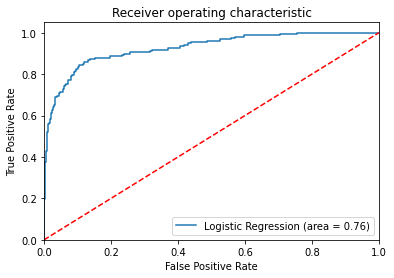

                   Col  Coeff
9            Undergrad   2.24
6           CD Account   1.25
8               Online   0.70
7           CreditCard   0.38
11            Advanced   0.21
10            Graduate   0.15
2               Family   0.08
0                  Age   0.06
3                CCAvg   0.06
5   Securities Account   0.06
1               Income   0.03
4             Mortgage   0.00


In [31]:
for solverType in ["liblinear", "newton-cg", "lbfgs", "sag"]:
    print("================================")
    print(solverType)
    model = LogisticRegression(random_state=10,solver=solverType,max_iter=10000)
    model.fit(X_train, y_train)
    #predict on test
    y_predict = model.predict(X_test)
    coef_df = pd.DataFrame(model.coef_)
    coef_df['intercept'] = model.intercept_
    print(coef_df)
    model_score = model.score(X_test, y_test)
    print(model_score)
    print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
    print("Precision:",metrics.precision_score(y_test, y_predict))
    print("Recall:",metrics.recall_score(y_test, y_predict))
    print("Trainig accuracy",model.score(X_train,y_train))  
    print("Testing accuracy",model.score(X_test, y_test))
    print("F1 Score:",f1_score(y_test,y_predict))
    print("Roc Auc Score:",roc_auc_score(y_test,y_predict))
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    fi = pd.DataFrame()
    fi['Col'] = X_train.columns
    fi['Coeff'] = np.round(abs(model.coef_[0]),2)
    print(fi.sort_values(by='Coeff',ascending=False))
    print("================================")

In [32]:
### For all solver types, the results do not vary
### the model has high Accuracy and Precision, but low Recall
### returning very few results, but most of its predicted labels are correct

In [33]:
for solverType in ["liblinear", "newton-cg", "lbfgs", "sag"]:
    print("================================")
    print(solverType)
    model = LogisticRegression(random_state=10,solver=solverType,max_iter=10000)
    model.fit(X_train, y_train)
    #predict on test
    y_predict = model.predict(X_test)
    coef_df = pd.DataFrame(model.coef_)
    coef_df['intercept'] = model.intercept_
    model_score = model.score(X_test, y_test)
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    fi = pd.DataFrame()
    fi['Col'] = X_train.columns
    fi['Coeff'] = np.round(abs(model.coef_[0]),2)
    print(fi.sort_values(by='Coeff',ascending=False))
    print("================================")



liblinear
                   Col  Coeff
9            Undergrad   4.53
6           CD Account   2.87
10            Graduate   1.00
8               Online   0.94
11            Advanced   0.89
7           CreditCard   0.73
5   Securities Account   0.49
2               Family   0.40
3                CCAvg   0.13
1               Income   0.05
0                  Age   0.00
4             Mortgage   0.00
newton-cg
                   Col  Coeff
6           CD Account   2.90
9            Undergrad   2.72
11            Advanced   1.44
10            Graduate   1.28
8               Online   0.91
7           CreditCard   0.63
2               Family   0.61
5   Securities Account   0.34
3                CCAvg   0.16
1               Income   0.06
0                  Age   0.02
4             Mortgage   0.00
lbfgs
                   Col  Coeff
6           CD Account   2.92
9            Undergrad   2.74
11            Advanced   1.41
10            Graduate   1.26
8               Online   0.91
7           Cr

In [34]:
#WE have high accuracy and high precision: which means we are getting the correct prediction

In [35]:
# we have lower recall : which means we are missing a lot more people who could be given the loan

In [36]:
#Here the bank wants to give loan to the people who are eligible for the home loan i.e. 
#less number of False Positive, if FP is high bank would lose money. 
#So that the bank doesn't lose money on the people who are not eligible for the loan. 
#Hence Precision is the important metric.

#After achieving the desired accuracy we can deploy the model for practical use. 
#As in the bank now can predict who is eligible for home loan. They can use the model for upcoming customers.


# since the recall is lower, which means we could be making a lot more loans , but we are missing a lot more

<AxesSubplot:xlabel='Undergrad', ylabel='count'>

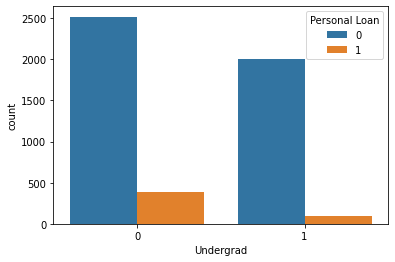

In [38]:
sns.countplot(x='Undergrad', data=pdata,hue="Personal Loan")



<AxesSubplot:xlabel='CD Account', ylabel='count'>

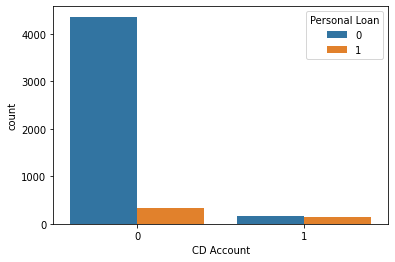

In [39]:
sns.countplot(x='CD Account', data=pdata,hue="Personal Loan")


<AxesSubplot:xlabel='Online', ylabel='count'>

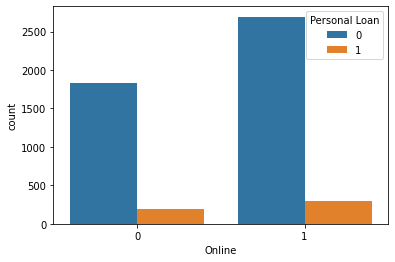

In [40]:
sns.countplot(x='Online', data=pdata,hue="Personal Loan")


<AxesSubplot:xlabel='CreditCard', ylabel='count'>

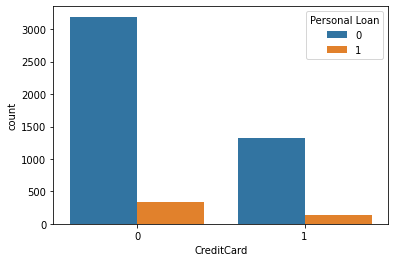

In [41]:
sns.countplot(x='CreditCard', data=pdata,hue="Personal Loan")


<AxesSubplot:xlabel='Advanced', ylabel='count'>

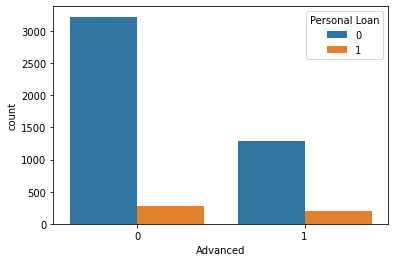

In [42]:
sns.countplot(x='Advanced', data=pdata,hue="Personal Loan")